<h3>This notebook is made up of 6 sections, each with a different functionality. The 6 sections are as follows :

1. Enviroment Setup Section
2. Data Exploration Section
3. Inference Section
4. Pose Extraction Section
5. Training Section
6. Response Time Testing Section
7. Fréchet Inception Distance (FID) Testing Section

Ensure that you are connected to a GPU. You may use the T4 GPU if you are on running this notebook on Google colab

Important : Please run the cells in the enviroment setup section before proceeding to any other sections. Failure to do this will result in the other sections unable to function!

It will take approximately about 10 minutes to install and setup the enviroment
<h3>




#<b>Enviroment Setup Section<b>
<h5> Please run the cell in the enviroment setup before proceeding to run any of the other sections. Simply click on the play button below and ensure all cells have been ran <h5>

In [1]:
%cd /content

!sudo apt-get install python3.8
!sudo apt-get install python3.8-distutils
# Installing requirements for MMPose
!pip install -U openmim
!mim install mmengine
!mim install "mmcv>=2.0.1"
!mim install "mmpose>=1.1.0"
!pip install pyyaml
!pip install Pillow

!git clone https://github.com/open-mmlab/mmpose.git
# The master branch is version 1.x
%cd mmpose
%pip install -r requirements.txt
%pip install -v -e .

/content
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libpython3.8-minimal libpython3.8-stdlib mailcap mime-support
  python3.8-minimal
Suggested packages:
  python3.8-venv binfmt-support
The following NEW packages will be installed:
  libpython3.8-minimal libpython3.8-stdlib mailcap mime-support python3.8
  python3.8-minimal
0 upgraded, 6 newly installed, 0 to remove and 19 not upgraded.
Need to get 5,098 kB of archives.
After this operation, 18.9 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 mailcap all 3.70+nmu1ubuntu1 [23.8 kB]
Get:2 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy/main amd64 libpython3.8-minimal amd64 3.8.18-1+jammy1 [794 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/main amd64 mime-support all 3.66 [3,696 B]
Get:4 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy/main amd64 python3

Looking in links: https://download.openmmlab.com/mmcv/dist/cu118/torch2.1.0/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 449.8/449.8 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.7/254.7 kB 31.8 MB/s eta 0:00:00
Looking in links: https://download.openmmlab.com/mmcv/dist/cu118/torch2.1.0/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.3/99.3 MB 9.4 MB/s eta 0:00:00
Looking in links: https://download.openmmlab.com/mmcv/dist/cu118/torch2.1.0/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.6/50.6 kB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 436.0/436.0 kB 35.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 56.3 MB/s eta 0:00:00
  Created wheel for chumpy: filename=chumpy-0.70-py3-none-any.whl size=58281 sha256=b1ef1f7b4a50e46e2bf46f802a07d921b0123a5356c567d

In [2]:
%cd /content

!pip install opencv-python-headless
import os
import cv2
from tqdm import tqdm
from ipywidgets import interact, widgets
from IPython.display import display, HTML
from base64 import b64encode
from moviepy.editor import VideoFileClip
import subprocess


!git clone https://github.com/YUyou0/ict3104-team14-2023.git

!sudo apt-get install python3.8
!sudo apt-get install python3.8-distutils
!sudo apt-get update
!python --version
!apt-get update
!apt install software-properties-common
!sudo dpkg --remove --force-remove-reinstreq python3-pip python3-setuptools python3-wheel
!apt-get install python3-pip

!cd /content/ict3104-team14-2023
!export PYTHONPATH=/content/FollowYourPose:$PYTHONPATH
# %pip install -r requirements.txt
!python3.8 -m pip install -q -U --pre triton
!apt update
!python3.8 -m pip install -q diffusers==0.11.1 torch==1.13.1 transformers==4.26.0 bitsandbytes==0.35.4 \
imageio-ffmpeg xformers==0.0.16  --extra-index-url https://download.pytorch.org/whl/cu113

%cd /content/ict3104-team14-2023/
!python3.8 -m pip install -r requirements.txt

/content
Cloning into 'ict3104-team14-2023'...
remote: Enumerating objects: 216, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 216 (delta 20), reused 44 (delta 15), pack-reused 164
Receiving objects: 100% (216/216), 85.39 MiB | 16.48 MiB/s, done.
Resolving deltas: 100% (80/80), done.
Updating files: 100% (37/37), done.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
python3.8 is already the newest version (3.8.18-1+jammy1).
0 upgraded, 0 newly installed, 0 to remove and 19 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
python3.8-distutils is already the newest version (3.8.18-1+jammy1).
0 upgraded, 0 newly installed, 0 to remove and 19 not upgraded.
Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x

In [3]:
%mkdir checkpoints
!git lfs install
!git clone https://huggingface.co/YueMafighting/FollowYourPose_v1
%mv /content/ict3104-team14-2023/FollowYourPose_v1/* /content/ict3104-team14-2023/checkpoints/
%rm -rf FollowYourPose_v1

!sudo apt-get install python3.8
!sudo apt-get install python3.8-distutils

Updated git hooks.
Git LFS initialized.
Cloning into 'FollowYourPose_v1'...
remote: Enumerating objects: 42, done.
remote: Total 42 (delta 0), reused 0 (delta 0), pack-reused 42
Unpacking objects: 100% (42/42), 584.62 KiB | 8.99 MiB/s, done.
Filtering content: 100% (9/9), 9.75 GiB | 47.24 MiB/s, done.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
python3.8 is already the newest version (3.8.18-1+jammy1).
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
python3.8-distutils is already the newest version (3.8.18-1+jammy1).
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.


# <b>Data Exploration Section<b>

<h5>This section allows you to create new data folders and upload videos for those folders as well.You can also watch the playback of those videos in this section. Please follow the steps carefully and accordingly<h5>

<h3><b>Step 1 : Select a data folder</b>

Run this cell and select a data folder that you want to inspect from the dropdown menu at the bottom of this cell  <h3>

In [ ]:
import os
import cv2
from tqdm import tqdm
from ipywidgets import interact, widgets
from IPython.display import display, HTML
from base64 import b64encode
from moviepy.editor import VideoFileClip
import subprocess

%cd /content/ict3104-team14-2023/

# Define the directory path you want to select folders from
directory_path = 'input_videos'  # Replace with your directory path

# Get a list of subdirectories in the specified directory
subdirectories = [d for d in os.listdir(directory_path) if os.path.isdir(os.path.join(directory_path, d))]

# Add empty as the first item to represent no selection initially
if subdirectories[0] != "":
    subdirectories.insert(0, "")

# Create a dropdown widget
folder_dropdown = widgets.Dropdown(
    options=subdirectories,
    description='Select folder:',
)

# Function to handle folder selection
def on_folder_selected(change):
    global selected_folder
    selected_folder = change.new
    print(f'Selected folder: {selected_folder}')

# Attach the event handler to the dropdown's value change
folder_dropdown.observe(on_folder_selected, names='value')

# Display the dropdown
display(folder_dropdown)

/content/ict3104-team14-2023


Dropdown(description='Select folder:', options=('', 'dances', 'test', '.ipynb_checkpoints', 'charades'), value…

Selected folder: dances


<h3><b>Step 2 : Watch a video from the selected data folder</b>

Run this cell and select a video from the dropdown menu below to view it. The videos in the list are the videos that are in that data folder. If you wish to change to a different data folder, please rerun step 1 and select a different folder <h3>

In [ ]:
import os
import cv2
from tqdm import tqdm
from ipywidgets import interact, widgets, Video
from IPython.display import display, HTML
from base64 import b64encode
from moviepy.editor import VideoFileClip
import subprocess

video_dir = f'/content/ict3104-team14-2023/input_videos/{selected_folder}'

video_files = [f for f in os.listdir(video_dir) if f.endswith(('.mp4', '.avi', '.mkv'))]

# Add empty as the first item to represent no selection initially
if video_files[0] != "":
    video_files.insert(0, "")

# Create a dropdown widget to select an item
item_dropdown = widgets.Dropdown(options=video_files, description=" ")  # hardcoded spacing

# Define a function that will run based on the selected item
def run_function(selected_item):
    if selected_item != "":
      print(" ") # hardcoded spacing

      # Construct the path to the selected video
      video_path = os.path.join(video_dir, selected_item)
      print(f"The video {selected_item} is being loaded...Please wait\n")
      # Display the selected video using the display_video function
      display(display_video(video_path, width=1080, height=640, autoplay=True, loop=True, controls=True))
      print(f"The video {selected_item} was loaded successfully!")

# Configure video display widget settings
def display_video(video_path, width=640, height=360, autoplay=True, loop=True, controls=True):
    video_file = open(video_path, "rb").read()
    video_url = "data:video/mp4;base64," + b64encode(video_file).decode()
    video_tag = f'<video width="{width}" height="{height}" autoplay={"autoplay" if autoplay else ""} loop={"loop" if loop else ""} {"controls" if controls else ""}><source src="{video_url}" type="video/mp4"></video>'
    return HTML(data=video_tag)


# function to get video duration
def get_video_duration(video_path):
    try:
        video = VideoFileClip(video_path)
        duration = video.duration
        return duration
    except Exception as e:
        print(f"Error: {e}")
        return None

# Iterate through video files to collect information
def collect_information():
    for video_file in video_files:
        if video_file != "":
            video_path = os.path.join(video_dir, video_file)
            file_size = os.path.getsize(video_path)
            duration = get_video_duration(video_path)
            if duration is not None:
                print(f"Filename: {video_file}\t Size (bytes): {file_size} bytes\t Duration (seconds): {duration} seconds")
            else:
                print(f"Unable to determine video duration for {video_file}")

print(f"Files in '{selected_folder}' folder\n")
# get basic information to display as list
collect_information()
print('\n')
print("Select a video to play:")

# Create an interactive widget that triggers the function when an item is selected
item_dropdown.value = "" # hardcoded default setting
interactive_widget = widgets.interactive(run_function, selected_item=item_dropdown)

# Display the interactive widget
display(interactive_widget)

Files in 'dances' folder

Filename: raheem-pose.mp4	 Size (bytes): 6395999 bytes	 Duration (seconds): 14.13 seconds
Filename: car-turn.mp4	 Size (bytes): 941900 bytes	 Duration (seconds): 8.0 seconds
Filename: man-skiing.mp4	 Size (bytes): 649402 bytes	 Duration (seconds): 3.04 seconds


Select a video to play:


interactive(children=(Dropdown(description=' ', options=('', 'raheem-pose.mp4', 'car-turn.mp4', 'man-skiing.mp…

<h3> <b>Step 3 (Optional) : Create a new data folder</b>

Run this cell and give a name to this new data folder in the input field at the bottom of this cell. Then click submit to create a new data folder <h3>

In [ ]:
# Function to create a new folder
def create_new_folder(_):
    folder_name = folder_name_input.value.strip()  # Get folder name from input widget
    if folder_name:
        folder_path = os.path.join('/content/ict3104-team14-2023/input_videos', folder_name)
        if not os.path.exists(folder_path):
            os.makedirs(folder_path)
            print(f"Folder '{folder_name}' created successfully.")
        else:
            print(f"Folder '{folder_name}' already exists.Please choose another name")
    else:
        print("Please enter a valid folder name.")

# Create a text input widget for folder name
folder_name_input = widgets.Text(
    placeholder='Enter folder name',
    description='Folder Name:',
    disabled=False
)

# Create a button widget to trigger folder creation
create_folder_button = widgets.Button(
    description='Create Folder',
    disabled=False,
    button_style='info',  # You can customize the button style
)

# Create an output widget for displaying messages
output_widget = widgets.Output()

# Connect the button click event to the folder creation function
create_folder_button.on_click(create_new_folder)

# Display the widgets
display(folder_name_input, create_folder_button, output_widget)

Text(value='', description='Folder Name:', placeholder='Enter folder name')

Button(button_style='info', description='Create Folder', style=ButtonStyle())

Output()

Folder 'test' already exists.Please choose another name
Folder 'test2' created successfully.


<h3><b>Step 4 (optional) : Choose which folder to upload a new video</b>

Run this cell and select a folder using the dropdown menu below to specify which folder you would like to upload a new video to

In [ ]:
%cd /content/ict3104-team14-2023/

# Define the directory path you want to select folders from
directory_path = 'input_videos'  # Replace with your directory path

# Get a list of subdirectories in the specified directory
subdirectories = [d for d in os.listdir(directory_path) if os.path.isdir(os.path.join(directory_path, d))]

# Add empty as the first item to represent no selection initially
if subdirectories[0] != "":
    subdirectories.insert(0, "")

# Create a dropdown widget
folder_dropdown = widgets.Dropdown(
    options=subdirectories,
    description='Select folder:',
)

# Function to handle folder selection
def on_folder_selected(change):
    global selected_folder
    selected_folder = change.new
    print(f'Selected folder for uploading new video: {selected_folder}')

# Attach the event handler to the dropdown's value change
folder_dropdown.observe(on_folder_selected, names='value')

# Display the dropdown
display(folder_dropdown)

/content/ict3104-team14-2023


Dropdown(description='Select folder:', options=('', 'dances', 'test', 'test2', '.ipynb_checkpoints', 'charades…

Selected folder for uploading new video: charades


<h3><b>Step 5 (optional) : Upload a new video file to the data folder</b>

Run this cell to upload a new video. The video will be uploaded to the data folder selected in step 4. If you want to change which data folder the video will placed, please go back to running step 1, choose a different data folder, then run this cell again. You are able to upload multiple videos at once

In [ ]:
%cd /content/ict3104-team14-2023/input_videos/{selected_folder}

from google.colab import files
from tqdm import tqdm


# Upload a video file from your local machine
uploaded_files = files.upload()

# Check if any files were uploaded
if not uploaded_files:
  print("No files uploaded.")

else:
  # Assuming a single file was uploaded, get its name and data
  for index in range(len(uploaded_files)):
    uploaded_filename, uploaded_data = list(uploaded_files.items())[index]

    # Define the destination path for the uploaded video file
    destination_path = uploaded_filename

    # Convert data to bytes (if not already) before writing it to the file
    if not isinstance(uploaded_data, bytes):
        uploaded_data = uploaded_data.encode('utf-8')  # Replace 'utf-8' with the appropriate encoding if needed

    # Display a progress bar while saving the uploaded data to a file
    with open(destination_path, 'wb') as file, tqdm(total=len(uploaded_data), unit='B', unit_scale=True) as pbar:
        pbar.set_description("Uploading")
        file.write(uploaded_data)
        pbar.update(len(uploaded_data))
    print(f"File '{uploaded_filename}' has been uploaded and saved in '{selected_folder}' folder.\n")

/content/ict3104-team14-2023/input_videos/charades


Saving man-skiing.mp4 to man-skiing.mp4
Saving car-turn.mp4 to car-turn.mp4


Uploading: 100%|██████████| 649k/649k [00:00<00:00, 113MB/s]


File 'man-skiing.mp4' has been uploaded and saved in 'charades' folder.



Uploading: 100%|██████████| 942k/942k [00:00<00:00, 196MB/s]

File 'car-turn.mp4' has been uploaded and saved in 'charades' folder.



<b><h3>You have reached the end of the data-exploration section!<h3><b>

# <b>Inference Section<b>

<h5>This section allows you to create new AI generated gifs through the inputs of an extracted pose and an input validation prompt. You will also need to specify which config file to be used for the inferencing. Please follow the steps carefully and accordingly  <h5>

<h3> <b>Step 1 : Select a pretrained model</b>

Run this cell to select the pretrained model that you want to use for inferencing.<h3>


In [9]:
import os
import cv2
from tqdm import tqdm
from ipywidgets import interact, widgets
from IPython.display import display, HTML
from base64 import b64encode
from moviepy.editor import VideoFileClip
import subprocess


# Define the path to the folder containing the files
folder_path = '/content/ict3104-team14-2023/configs'  # Replace with the actual folder path

# List files in the folder
model_list = os.listdir(folder_path)
model_list.insert(0,"")  # Insert "" at the start of the list

# Create a dropdown widget
model_dropdown = widgets.Dropdown(
    options=model_list,
    description='Select a file:'
)

# Function to handle folder selection
def on_model_selected(change):
    global selected_model
    selected_model = change.new
    print(f'Selected model: {selected_model}')

# Attach the event handler to the dropdown's value change
model_dropdown.observe(on_model_selected, names='value')

# Display the dropdown widget
display(model_dropdown)

Dropdown(description='Select a file:', options=('', 'pose_sample5.yaml', 'pose_sample4.yaml', 'pose_sample2.ya…

Selected model: pose_sample.yaml


<h3> <b>Step 2 : Select a pose</b>

Run this cell to select the pose that you want to use for inferencing.<h3>

In [10]:
# Define the path to the folder containing the files
folder_path = '/content/ict3104-team14-2023/pose_example'  # Replace with the actual folder path

# List files in the folder
pose_list = os.listdir(folder_path)
pose_list.insert(0,"")  # Insert "" at the start of the list

# Create a dropdown widget
pose_dropdown = widgets.Dropdown(
    options=pose_list,
    description='Select a file:'
)

# Function to handle folder selection
def on_pose_selected(change):
    global selected_pose
    selected_pose = change.new
    print(f'Selected pose: {selected_pose}')

# Attach the event handler to the dropdown's value change
pose_dropdown.observe(on_pose_selected, names='value')

# Display the dropdown widget
display(pose_dropdown)

Dropdown(description='Select a file:', options=('', 'vis_kun_pose2.mov', 'vis_ikun_pose1.MOV'), value='')

Selected pose: vis_kun_pose2.mov


<h3><b>Step 3 : Input validation prompt(s)</b>

Run this cell and input a validation prompt in the field below.You may submit up to 5 validation prompts. The prompts you input will be used to creating new AI generated contents.  <h3>

In [11]:
import yaml

config_file_path = f'/content/ict3104-team14-2023/configs/{selected_model}'

# Load the YAML file as a list of lines
with open(config_file_path, 'r') as file:
    lines = file.readlines()

lines[6] = "\n"
lines[7] = "\n"  # Add a newline character to match the YAML format
lines[8] = "\n"  # Add a newline character to match the YAML format
lines[9] = "\n"  # Add a newline character to match the YAML format
lines[10] = "\n"  # Add a newline character to match the YAML format
lines[11] = "\n"  # Add a newline character to match the YAML format
lines[12] = "\n"  # Add a newline character to match the YAML format
lines[13] = "\n"  # Add a newline character to match the YAML format
lines[14] = "\n"  # Add a newline character to match the YAML format

with open(config_file_path, 'w') as file:
      file.writelines(lines)

# Create a text input widget for the first validation prompt
text_input = widgets.Text(
    value='',  # Default value (you can set a default value if needed)
    placeholder='Enter the validation prompt',  # Placeholder text
    description='Text Input:',  # Label for the input field
)

# Create a text input widget for the second validation prompt
text_input2 = widgets.Text(
    value='',  # Default value (you can set a default value if needed)
    placeholder='Enter a validation prompt',  # Placeholder text
    description='Text Input:',  # Label for the input field
)

# Create a text input widget for the third validation prompt
text_input3 = widgets.Text(
    value='',  # Default value (you can set a default value if needed)
    placeholder='Enter a validation prompt',  # Placeholder text
    description='Text Input:',  # Label for the input field
)

# Create a text input widget for the third validation prompt
text_input4 = widgets.Text(
    value='',  # Default value (you can set a default value if needed)
    placeholder='Enter a validation prompt',  # Placeholder text
    description='Text Input:',  # Label for the input field
)

# Create a text input widget for the third validation prompt
text_input5 = widgets.Text(
    value='',  # Default value (you can set a default value if needed)
    placeholder='Enter a validation prompt',  # Placeholder text
    description='Text Input:',  # Label for the input field
)

# Create a submit button for the first validation prompt
submit_button = widgets.Button(
    description='Submit',  # Label for the button
)

# Create a submit button for the second validation prompt
submit_button2 = widgets.Button(
    description='Submit',  # Label for the button
)

# Create a submit button for the third validation prompt
submit_button3 = widgets.Button(
    description='Submit',  # Label for the button
)

# Create a submit button for the third validation prompt
submit_button4 = widgets.Button(
    description='Submit',  # Label for the button
)

# Create a submit button for the third validation prompt
submit_button5 = widgets.Button(
    description='Submit',  # Label for the button
)

# Create a variable to store the first user's input
user_input = ''

# Create a variable to store the second user's input
user_input2 = ''

# Create a variable to store the third user's input
user_input3 = ''

# Create a variable to store the third user's input
user_input4 = ''

# Create a variable to store the third user's input
user_input5 = ''

# Define a function to update the user_input variable when the first submit button is clicked
def on_submit_button_click(b):
    global user_input
    user_input = text_input.value
    if user_input == "":
      print("Validation prompt is empty!")
    else:
      print(f"Validation prompt 1 has been submitted : {user_input} ")

# Define a function to update the user_input variable when the second submit button is clicked
def on_submit_button_click2(b):
    global user_input2
    user_input2 = text_input2.value
    if user_input2 == "":
      print("Validation prompt is empty!")
    else:
      print(f"Validation prompt 2 has been submitted : {user_input2} ")

# Define a function to update the user_input variable when the third submit button is clicked
def on_submit_button_click3(b):
    global user_input3
    user_input3 = text_input3.value
    if user_input3 == "":
      print("Validation prompt is empty!")
    else:
      print(f"Validation prompt 3 has been submitted : {user_input3} ")

# Define a function to update the user_input variable when the third submit button is clicked
def on_submit_button_click4(b):
    global user_input4
    user_input4 = text_input4.value
    if user_input4 == "":
      print("Validation prompt is empty!")
    else:
      print(f"Validation prompt 4 has been submitted : {user_input4} ")

# Define a function to update the user_input variable when the third submit button is clicked
def on_submit_button_click5(b):
    global user_input5
    user_input5 = text_input5.value
    if user_input5 == "":
      print("Validation prompt is empty!")
    else:
      print(f"Validation prompt 5 has been submitted : {user_input5} ")


# Attach the click event handler to the first submit button
submit_button.on_click(on_submit_button_click)

# Attach the click event handler to the second submit button
submit_button2.on_click(on_submit_button_click2)

# Attach the click event handler to the second submit button
submit_button3.on_click(on_submit_button_click3)

# Attach the click event handler to the second submit button
submit_button4.on_click(on_submit_button_click4)

# Attach the click event handler to the second submit button
submit_button5.on_click(on_submit_button_click5)

# Display the widgets
display(text_input, submit_button)

# Display the widgets
display(text_input2, submit_button2)

# Display the widgets
display(text_input3, submit_button3)

# Display the widgets
display(text_input4, submit_button4)

# Display the widgets
display(text_input5, submit_button5)

Text(value='', description='Text Input:', placeholder='Enter the validation prompt')

Button(description='Submit', style=ButtonStyle())

Text(value='', description='Text Input:', placeholder='Enter a validation prompt')

Button(description='Submit', style=ButtonStyle())

Text(value='', description='Text Input:', placeholder='Enter a validation prompt')

Button(description='Submit', style=ButtonStyle())

Text(value='', description='Text Input:', placeholder='Enter a validation prompt')

Button(description='Submit', style=ButtonStyle())

Text(value='', description='Text Input:', placeholder='Enter a validation prompt')

Button(description='Submit', style=ButtonStyle())

Validation prompt 3 has been submitted : batman 


<h3> <b>Step 6 : Confirm your validation prompt(s)</b>

Run this cell to confirm that your validation prompt(s) are correct <h3>

In [12]:
print(f"Validation prompt 1 : {user_input}")
print(f"Validation prompt 2 : {user_input2}")
print(f"Validation prompt 3 : {user_input3}")
print(f"Validation prompt 4 : {user_input4}")
print(f"Validation prompt 5 : {user_input5}")

# Check if the selected option is valid
if (user_input == "") and (user_input2 == "") and (user_input3 == "") and (user_input4 == "")and (user_input5 == ""):
    raise ValueError("You have not written a validation prompt.")

Validation prompt 1 : 
Validation prompt 2 : 
Validation prompt 3 : batman
Validation prompt 4 : 
Validation prompt 5 : 


<h3><b>Step 7 : Update validation prompt(s) to configuration file</b>

Run this cell to submit the validation prompt(s) to the configuration file<h3>

In [13]:
!pip install pyyaml
import yaml

config_file_path = f'/content/ict3104-team14-2023/configs/{selected_model}'
line_number = 6                   # Replace with the line number you want to update (zero-based index)
line_number2 = 7
line_number3 = 8
line_number4 = 9
line_number5 = 10

# Load the YAML file as a list of lines
with open(config_file_path, 'r') as file:
    lines = file.readlines()

if user_input != "":
  # Get user input for the new value for first validation prompt
  new_value1 = f"  - \"{user_input}\" "
  # Update the specific line in the list with the new value
  lines[line_number] = f"{new_value1}\n"  # Add a newline character to match the YAML format
  # Write the updated list of lines back to the YAML file
  with open(config_file_path, 'w') as file:
      file.writelines(lines)

  # Load the YAML file as a list of lines
  with open(config_file_path, 'r') as file:
      lines = file.readlines()


if user_input2 != "":
  # Get user input for the new value for second validation prompt
  new_value2 = f"  - \"{user_input2}\" "
  # Update the specific line in the list with the new value
  lines[line_number2] = f"{new_value2}\n"  # Add a newline character to match the YAML format
  # Write the updated list of lines back to the YAML file
  with open(config_file_path, 'w') as file:
      file.writelines(lines)

if user_input3 != "":
  # Get user input for the new value for third validation prompt
  new_value3 = f"  - \"{user_input3}\" "
  # Update the specific line in the list with the new value
  lines[line_number3] = f"{new_value3}\n"  # Add a newline character to match the YAML format
  # Write the updated list of lines back to the YAML file
  with open(config_file_path, 'w') as file:
      file.writelines(lines)

if user_input4 != "":
  # Get user input for the new value for fourth validation prompt
  new_value4 = f"  - \"{user_input4}\" "
  # Update the specific line in the list with the new value
  lines[line_number4] = f"{new_value4}\n"  # Add a newline character to match the YAML format
  # Write the updated list of lines back to the YAML file
  with open(config_file_path, 'w') as file:
      file.writelines(lines)

if user_input5 != "":
  # Get user input for the new value for fourth validation prompt
  new_value5 = f"  - \"{user_input5}\" "
  # Update the specific line in the list with the new value
  lines[line_number5] = f"{new_value5}\n"  # Add a newline character to match the YAML format
  # Write the updated list of lines back to the YAML file
  with open(config_file_path, 'w') as file:
      file.writelines(lines)

#Reset the inference step back to 50
config_file_path = f'/content/ict3104-team14-2023/configs/{selected_model}'
line_number = 18                 # Replace with the line number you want to update (zero-based index)

# Load the YAML file as a list of lines
with open(config_file_path, 'r') as file:
    lines = file.readlines()

if user_input != "":
  # Get user input for the new value for first validation prompt
  default_inference_value = f"  num_inference_steps: 50"
  # Update the specific line in the list with the new value
  lines[line_number] = f"{default_inference_value}\n"  # Add a newline character to match the YAML format
  # Write the updated list of lines back to the YAML file
  with open(config_file_path, 'w') as file:
      file.writelines(lines)

  # Load the YAML file as a list of lines
  with open(config_file_path, 'r') as file:
      lines = file.readlines()

<h3><b>Step 8 : File verification and load execution command</b>

Run this file for final file checking and loading of execution command.<h3>

In [14]:
if selected_model != "":
  print("Pretrained model loaded successful")
  print(selected_model)

print("\n")

if selected_pose != "":
   print("Stickman pose loaded successful")
   print(selected_pose)

print("\n")

if (user_input != "") or (user_input2 != "") or (user_input3 !="") or (user_input4 !=""):
   print("Validation prompt(s) loaded successful")
   print(f"Validation prompt 1 : {user_input}")
   print(f"Validation prompt 2 : {user_input2}")
   print(f"Validation prompt 3 : {user_input3}")
   print(f"Validation prompt 4 : {user_input4}")
   print(f"Validation prompt 5 : {user_input5}")

print("\n")

if selected_model == "":
    raise ValueError("Invalid option selected. Please choose from the provided list.")

# Check if the selected option is valid
if selected_pose == "":
    raise ValueError("Invalid option selected. Please choose from the provided list.")

# Check if the selected option is valid
if (user_input == "") and (user_input2 == "") and (user_input3 == "") and (user_input4 == "") and (user_input5 == "") :
    raise ValueError("You have not written a validation prompt.")


command = f"TORCH_DISTRIBUTED_DEBUG=DETAIL accelerate launch txt2video.py --config=\"configs/{selected_model}\" --skeleton_path=\"./pose_example/{selected_pose}\""
print(command)

Pretrained model loaded successful
pose_sample.yaml


Stickman pose loaded successful
vis_kun_pose2.mov


Validation prompt(s) loaded successful
Validation prompt 1 : 
Validation prompt 2 : 
Validation prompt 3 : batman
Validation prompt 4 : 
Validation prompt 5 : 


TORCH_DISTRIBUTED_DEBUG=DETAIL accelerate launch txt2video.py --config="configs/pose_sample.yaml" --skeleton_path="./pose_example/vis_kun_pose2.mov"


<h3> <b>Step 9 : Start inferencing process</b>

Run this cell below to start the inferencing execution. The output gifs will be saved in checkpoints/inference. You can view and download them after the process has been completed in checkpoints/inference <h3>

In [15]:
%cd /content/ict3104-team14-2023

from datetime import datetime
import pytz
# Set the timezone to Singapore Standard Time (SGT)
sgt_timezone = pytz.timezone('Asia/Singapore')
# Get the current date and time in SGT
current_datetime_sgt = datetime.now(sgt_timezone)
# Format the datetime to exclude seconds
formatted_datetime_sgt = current_datetime_sgt.strftime("%Y-%m-%d %H:%M")
gif_output = formatted_datetime_sgt

!{command}

/content/ict3104-team14-2023
The following values were not passed to `accelerate launch` and had defaults used instead:
	`--num_processes` was set to a value of `1`
	`--num_machines` was set to a value of `1`
	`--mixed_precision` was set to a value of `'no'`
	`--dynamo_backend` was set to a value of `'no'`
To avoid this warning pass in values for each of the problematic parameters or run `accelerate config`.
A matching Triton is not available, some optimizations will not be enabled.
Error caught was: module 'triton.language' has no attribute 'constexpr'
/usr/local/lib/python3.8/dist-packages/torchvision/transforms/_functional_video.py:6: UserWarning: The 'torchvision.transforms._functional_video' module is deprecated since 0.12 and will be removed in the future. Please use the 'torchvision.transforms.functional' module instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/transforms/_transforms_video.py:22: UserWarning: The 'torchvision.transforms._transforms_vid

<h3> <b>Step 10 (optional) : Save the inferencing details</b>

Run this cell to save the information of the model and pose used, as well as the name of the output folder  <h3>

In [ ]:
import csv

# Specify the CSV file path you want to create
csv_file_path = f"/content/ict3104-team14-2023/inference-logs.csv"

# Check if the CSV file exists
if not os.path.exists(csv_file_path):
    # If it doesn't exist, create it and write headers (if needed)
    with open(csv_file_path, 'w', newline='') as csvfile:
        # You can write headers here if needed
        # For example:
        fieldnames = ['model', 'pose','gif-folder']
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()
    print(f"CSV file '{csv_file_path}' created successfully.")
else:
    print(f"CSV file '{csv_file_path}' already exists, so it was not created.")

# Create or open the CSV file in append mode
with open(csv_file_path, mode='a', newline='') as file:
    writer = csv.writer(file)

    # Write the variables into a CSV row
    writer.writerow([selected_model,selected_pose,gif_output])

print(f"Variables saved to '{csv_file_path}' successfully.")

CSV file '/content/ict3104-team14-2023/inference-logs.csv' created successfully.
Variables saved to '/content/ict3104-team14-2023/inference-logs.csv' successfully.


<b><h3>You have reached the end of the Inference section!<h3><b>

# <b>Pose Extraction Section<b>

<h5>This section allows you to select a video from the video folders and extract the pose skeleton from it.<h5>

<h3><b>Select a video for pose extraction</b>


Important : If you are using Google colab, please restart the runtime before running this cell!

Run this cell and select which video from the data folders you want to perform pose extraction. After selecting, the pose extraction process will initiate. Please wait until it is finished. The output pose video will be in the pose_example folder<h3>

In [ ]:
%cd /content/mmpose/mmpose
from ipywidgets import Output, GridspecLayout, Image, Video, HBox
from mmpose.apis import MMPoseInferencer
from IPython import display
from ipyfilechooser import FileChooser
import os


results = []

grid = GridspecLayout(1, 2)

fd = FileChooser('/content/ict3104-team14-2023/input_videos')

# Create and display a FileChooser widget
out = Output()
with out:
    display.display(fd)
grid[0, 0] = out

# Capture the output from the function
stdout = Output()
grid[0, 1] = stdout

@stdout.capture()
def infer(arg1):
    img_path = fd.selected

    # instantiate the inferencer using the model alias
    inferencer = MMPoseInferencer('human', device='cuda')

    # The MMPoseInferencer API employs a lazy inference approach,
    # creating a prediction generator when given input
    result_generator = inferencer(img_path, vis_out_dir='/content/ict3104-team14-2023/pose_example', black_background=True, radius=4, thickness=2)

    results = [result for result in result_generator]

    # Display output
    output_dir = '/content/ict3104-team14-2023/pose_example'
    files = os.listdir(output_dir)

    if not files:
        return

    # Sort files by modification time, latest first
    files.sort(key=lambda x: os.path.getmtime(os.path.join(output_dir, x)), reverse=True)

    # The latest file is the first one in the sorted list
    output_file = os.path.join(output_dir, files[0])

fd.register_callback(infer)

grid

/content/mmpose/mmpose


GridspecLayout(children=(Output(layout=Layout(grid_area='widget001')), Output(layout=Layout(grid_area='widget0…

# <b>Training Section<b>

<h5>This section allows you to train a new model based on an existing model to further improve upon it. Please follow the steps carefully and accordingly<h5>

<h3><b>Step 1 : Select an existing model to be trained</b>

Run this cell to select the pretrained model that is to be trained upon.

In [ ]:
import os
import cv2
from tqdm import tqdm
from ipywidgets import interact, widgets
from IPython.display import display, HTML
from base64 import b64encode
from moviepy.editor import VideoFileClip
import subprocess

# Define the path to the folder containing the files
folder_path = '/content/ict3104-team14-2023/configs'  # Replace with the actual folder path

# List files in the folder
model_list = os.listdir(folder_path)
model_list.insert(0,"")  # Insert "" at the start of the list

# Create a dropdown widget
model_dropdown = widgets.Dropdown(
    options=model_list,
    description='Select a file:'
)

# Display the dropdown widget
display(model_dropdown)

Dropdown(description='Select a file:', options=('', 'pose_sample.yaml', 'pose_train.yaml'), value='')

<h3><b>Step 2 : Confirm your selected pretrained model to be used for training<h3></b>

Run this cell to confirm your selected pretrained model

In [ ]:
# Get the selected file name from the dropdown
selected_model = model_dropdown.value

# Check if the selected option is valid
if selected_model == "":
    raise ValueError("Invalid option selected. Please choose from the provided list.")

# Now 'selected_file' contains the selected file name as a string
print(f"Selected model: {selected_model}")

Selected model: pose_train.yaml


<h3><b>Step 3 : Input a name for this new model to be trained</b>

Run this cell and input a new name for the model in the input field below

In [ ]:
# Create a text input widget
text_input = widgets.Text(
    value='',  # Default value (you can set a default value if needed)
    placeholder='Enter new model name',  # Placeholder text
    description='Name Input:',  # Label for the input field
)

# Create a submit button
submit_button = widgets.Button(
    description='Submit',  # Label for the button
)

# Create a variable to store the user's input
user_input_modelName = ''

# Define a function to update the user_input variable when the submit button is clicked
def on_submit_button_click(b):
    global user_input_modelName
    user_input_modelName = text_input.value
    if user_input_modelName == "":
      print("You have not created a name for this new model!")
    else:
      print(f"New model name has been submitted : {user_input_modelName}")

# Attach the click event handler to the submit button
submit_button.on_click(on_submit_button_click)

# Display the widgets
display(text_input, submit_button)

Text(value='', description='Name Input:', placeholder='Enter new model name')

Button(description='Submit', style=ButtonStyle())

New model name has been submitted : new-m
New model name has been submitted : new-model


<h3><b>Step 4 : Select a dataset to be used for the training<h3></b>

Run this cell and select a dataset that is to be used for training from the dropdown list below.

In [ ]:
# Function to list file names in a folder and store their paths in an array
def list_file_names_and_paths(folder):
    global file_paths
    folder_path = os.path.join('/content/ict3104-team14-2023/input_videos', folder)
    if os.path.isdir(folder_path):
        file_paths = [os.path.join(folder_path, file) for file in os.listdir(folder_path)]
        file_names = [os.path.basename(file) for file in file_paths]
        print(f"List of file names in '{folder}':")
        for file_name in file_names:
            print(file_name)
    else:
        print(f"'{folder}' is not a valid folder.")

# Create a dropdown widget with an empty default option
folder_dropdown = widgets.Dropdown(
    options=[''] + os.listdir('/content/ict3104-team14-2023/input_videos'),  # Include an empty option
    description='Select a Folder:',
)

# Initialize the file_paths array
file_paths = []

# Define an event handler for the dropdown
def on_dropdown_change(change):
    global selected_folder
    selected_folder = change.new
    list_file_names_and_paths(selected_folder)

# Attach the event handler to the dropdown
folder_dropdown.observe(on_dropdown_change, names='value')

# Display the dropdown widget
display(folder_dropdown)

Dropdown(description='Select a Folder:', options=('', '.ipynb_checkpoints', 'dances', 'charades'), value='')

List of file names in 'charades':
0RJKT.mp4
2E8GU.mp4
52CKM.mp4
3LMTS.mp4
8ASRQ.mp4
5O0YS.mp4
5EFQ7.mp4
5D3X6.mp4
4GLAP.mp4
3IPI3.mp4
3JJ7C.mp4


<h3><b>Step 5 : Confirm dataset selection</b>

Run this cell to confirm that this is the dataset to be used for training

In [ ]:
# Define the file path
file_path = '/content/ict3104-team14-2023/followyourpose/data/charades.py'

# Line number to edit (0-based index)
line_number_to_edit = 172  # Change this to the line number you want to edit

# New content to replace the line
new_content = f"        video_path = os.path.join('input_videos', '{selected_folder}', video_id + '.mp4')"

# Read the original file
with open(file_path, 'r') as file:
    lines = file.readlines()

# Check if the line number to edit is within the range of the file
if line_number_to_edit < len(lines):
    # Edit the specified line
    lines[line_number_to_edit] = new_content

    # Write the updated content back to the file
    with open(file_path, 'w') as file:
        file.writelines(lines)

    print(f"{selected_folder} dataset has been selected.")
else:
    print("Line number out of range.")

charades dataset has been selected.


<h3><b>Step 6 : Edit the training-data.json file</b>

In the training-data folder, there is a training-data.json file. You need to edit this file in accordance to the dataset that you have specified to be used for training such as specifying how many data in that folder is to be used and what are the descriptions of those video data.

Make sure that the id fields in the config file matches with the video files that is in the selected data folder

Please complete the editing of this folder before proceeding to the next step. The example image of the config file is shown below

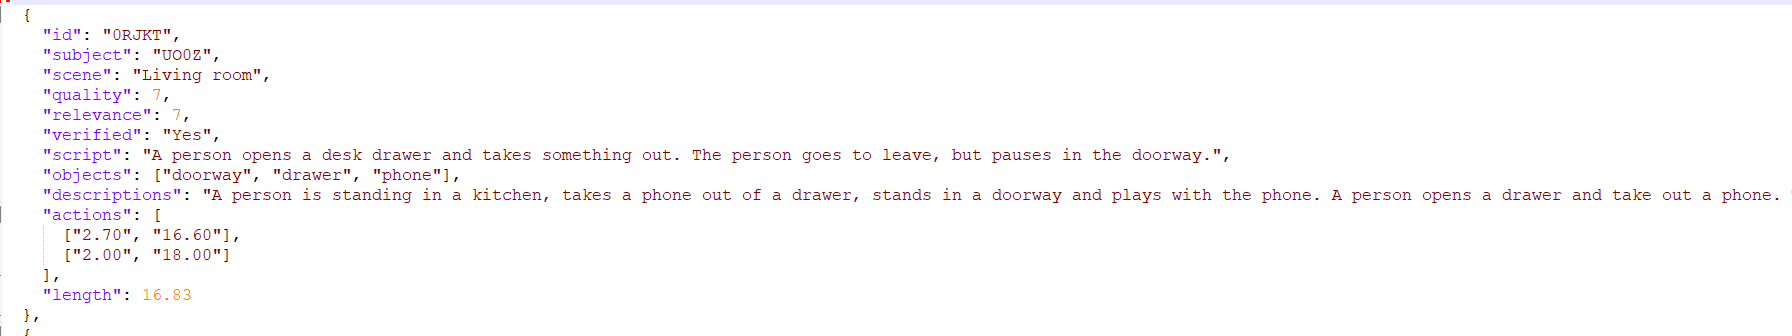


<h3><b>Step 7 : Start the training process</b>

Run this cell to start the training process. The new config file output will be added to the configs folder after the training has been completed

In [ ]:
import torch
import shutil
torch.cuda.empty_cache()

%cd /content/ict3104-team14-2023/
!pwd

command = f'''TORCH_DISTRIBUTED_DEBUG=DETAIL accelerate launch \
    --gpu_ids '0' \
    train_followyourpose.py \
    --config="configs/{selected_model}"'''

!{command}

# Define the old and new file names
old_name = '/content/ict3104-team14-2023/output/config.yaml'  # Update this path to your file
new_name = f'/content/ict3104-team14-2023/output/{user_input_modelName}.yaml'  # Update this path to your desired new name

# Rename the file
os.rename(old_name, new_name)

# Verify the file has been renamed
if os.path.exists(new_name):
    print("File renamed successfully.")
else:
    print("Failed to rename the file.")

# Define the source and destination file paths
source_file = f'/content/ict3104-team14-2023/output/{user_input_modelName}.yaml'  # Update this path to your source file
destination_folder = '/content/ict3104-team14-2023/configs'  # Update this path to your destination folder

# Move the file to the destination folder
shutil.move(source_file, destination_folder)

/content/ict3104-team14-2023
/content/ict3104-team14-2023
The following values were not passed to `accelerate launch` and had defaults used instead:
	`--num_processes` was set to a value of `1`
	`--num_machines` was set to a value of `1`
	`--mixed_precision` was set to a value of `'no'`
	`--dynamo_backend` was set to a value of `'no'`
To avoid this warning pass in values for each of the problematic parameters or run `accelerate config`.
A matching Triton is not available, some optimizations will not be enabled.
Error caught was: module 'triton.language' has no attribute 'constexpr'
/usr/local/lib/python3.8/dist-packages/torchvision/transforms/_functional_video.py:6: UserWarning: The 'torchvision.transforms._functional_video' module is deprecated since 0.12 and will be removed in the future. Please use the 'torchvision.transforms.functional' module instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/transforms/_transforms_video.py:22: UserWarning: The 'torchvisi

'/content/ict3104-team14-2023/configs/new-model.yaml'

# <b>Model Response Time Testing Section<b>

<h5>This section is structurally similar to the infernece section with the additional steps of being able to set the inference step of a chosen model and test the response time of that model with the configured inference step.Please follow the steps carefully and accordingly<h5>

<h3><b>Step 1 : Select a pretrained model for testing</b>

Run this cell to select the pretrained model that you want to use for inferencing.<h3>


In [ ]:
import os
import ipywidgets as widgets
from IPython.display import display

# Define the path to the folder containing the files
folder_path = '/content/ict3104-team14-2023/configs'  # Replace with the actual folder path

# List files in the folder
model_list = os.listdir(folder_path)
model_list.insert(0,"")  # Insert "" at the start of the list

# Create a dropdown widget
model_dropdown = widgets.Dropdown(
    options=model_list,
    description='Select a file:'
)

# Display the dropdown widget
display(model_dropdown)

Dropdown(description='Select a file:', options=('', 'pose_sample.yaml', 'pose_sample4.yaml', 'pose_sample5.yam…

<h3><b>Step 2 : confirm your selected pretrained model for testing</b>

Run this cell to confirm your selected pretrained model<h3>

In [ ]:
# Get the selected file name from the dropdown
selected_model = model_dropdown.value

# Check if the selected option is valid
if selected_model == "":
    raise ValueError("Invalid option selected. Please choose from the provided list.")

# Now 'selected_file' contains the selected file name as a string
print(f"Selected model: {selected_model}")

Selected model: pose_sample5.yaml


<h3><b>Step 3 : Input validation prompt</b>

Run this cell and input a validation prompt.The prompt you input will be used to test the response time of a new AI generated content.<h3>

In [ ]:
# Create a text input widget for the first validation prompt
text_input = widgets.Text(
    value='',  # Default value (you can set a default value if needed)
    placeholder='Enter the validation prompt',  # Placeholder text
    description='Text Input:',  # Label for the input field
)

# Create a submit button for the first validation prompt
submit_button = widgets.Button(
    description='Submit',  # Label for the button
)

# Create a variable to store the first user's input
user_input = ''

# Define a function to update the user_input variable when the first submit button is clicked
def on_submit_button_click(b):
    global user_input
    user_input = text_input.value
    if user_input == "":
      print("Validation prompt is empty!")
    else:
      print(f"Validation prompt has been submitted : {user_input} ")

# Attach the click event handler to the first submit button
submit_button.on_click(on_submit_button_click)


# Display the widgets
display(text_input, submit_button)

Text(value='', description='Text Input:', placeholder='Enter the validation prompt')

Button(description='Submit', style=ButtonStyle())

Validation prompt has been submitted : power ranger 


<h3><b>Step 4 : Confirm Validation prompt</b>

Run this cell to confirm that your validation prompt are correct<h3>

In [ ]:
print(f"Validation prompt : {user_input}")
# Check if the selected option is valid
if (user_input == ""):
  raise ValueError("You have not written a validation prompt.")

Validation prompt : power ranger


<h3><b>Step 5 : Update validation prompt to configuration file</b>

Run this cell to submit the validation prompt to the configuration file<h3>

In [ ]:
import yaml

config_file_path = f'/content/ict3104-team14-2023/configs/{selected_model}'
line_number = 6                   # Replace with the line number you want to update (zero-based index)

# Load the YAML file as a list of lines
with open(config_file_path, 'r') as file:
    lines = file.readlines()

if user_input != "":
  # Get user input for the new value for first validation prompt
  new_value1 = f"  - \"{user_input}\" "
  # Update the specific line in the list with the new value
  lines[line_number] = f"{new_value1}\n"  # Add a newline character to match the YAML format
  lines[7] = "\n"  # Add a newline character to match the YAML format
  lines[8] = "\n"  # Add a newline character to match the YAML format
  lines[9] = "\n"  # Add a newline character to match the YAML format
  lines[10] = "\n"  # Add a newline character to match the YAML format
  lines[11] = "\n"  # Add a newline character to match the YAML format
  lines[12] = "\n"  # Add a newline character to match the YAML format
  lines[13] = "\n"  # Add a newline character to match the YAML format
  lines[14] = "\n"  # Add a newline character to match the YAML format
  with open(config_file_path, 'w') as file:
      file.writelines(lines)



  # Load the YAML file as a list of lines
  with open(config_file_path, 'r') as file:
      lines = file.readlines()

<h3><b>Step 6 : Select a pose<h3></b>

Run this cell to select the pose that you want to use for inferencing.

In [ ]:
# Define the path to the folder containing the files
folder_path = '/content/ict3104-team14-2023/pose_example'  # Replace with the actual folder path

# List files in the folder
pose_list = os.listdir(folder_path)
pose_list.insert(0,"")  # Insert "" at the start of the list

# Create a dropdown widget
pose_dropdown = widgets.Dropdown(
    options=pose_list,
    description='Select a file:'
)

# Display the dropdown widget
display(pose_dropdown)

Dropdown(description='Select a file:', options=('', 'vis_kun_pose2.mov', 'vis_ikun_pose1.MOV'), value='')

<h3><b>Step 7 : Confirm your selected pose<h3></b>

Run this cell to confirm your selected pose

In [ ]:
# Get the selected file name from the dropdown
selected_pose = pose_dropdown.value

# Check if the selected option is valid
if selected_pose == "":
    raise ValueError("Invalid option selected. Please choose from the provided list.")

# Now 'selected_file' contains the selected file name as a string
print(f"Selected Pose: {selected_pose}")

Selected Pose: vis_kun_pose2.mov


<h3><b>Step 8 : Set inference step<h3></b>

Run this cell and set the inference step count in the input field

In [ ]:
# Function to handle the button click event
def on_submit_button_click(b):
    global user_input_inferenceStep
    user_input_inferenceStep= text_input.value
    # Check if the input is a valid whole number (integer)
    if  user_input_inferenceStep.isdigit():
        print(f"Inference step accepted: { user_input_inferenceStep}")
    else:
        print("Invalid input. Please enter a whole number (no decimals).")

# Create a text input widget
text_input = widgets.Text(
    placeholder='Set Inference Step',
    description='',
)

# Create a submit button
submit_button = widgets.Button(
    description='Submit',
)
submit_button.on_click(on_submit_button_click)

# Display the input field and submit button
display(text_input)
display(submit_button)

Text(value='', placeholder='Set Inference Step')

Button(description='Submit', style=ButtonStyle())

Inference step accepted: 1
Inference step accepted: 10


<h3><b>Step 9 : Update inference step to system<h3></b>

Run this cell to confirm and update the inference step

In [ ]:
print(f"Inference step : {user_input_inferenceStep}")

config_file_path = f'/content/ict3104-team14-2023/configs/{selected_model}'
line_number = 18                   # Replace with the line number you want to update (zero-based index)

# Load the YAML file as a list of lines
with open(config_file_path, 'r') as file:
    lines = file.readlines()

if user_input != "":
  # Get user input for the new value for first validation prompt
  new_value = f"  num_inference_steps: {user_input_inferenceStep}"
  # Update the specific line in the list with the new value
  lines[line_number] = f"{new_value}\n"  # Add a newline character to match the YAML format
  # Write the updated list of lines back to the YAML file
  with open(config_file_path, 'w') as file:
      file.writelines(lines)

  # Load the YAML file as a list of lines
  with open(config_file_path, 'r') as file:
      lines = file.readlines()

Inference step : 10


<h3><b>Step 10 : File verification and load execution command<h3></b>

Run this file for final files checking and loading of execution command.

In [ ]:
if selected_model != "":
  print("Pretrained model loaded successful")
  print(selected_model)

print("\n")

if selected_pose != "":
   print("Stickman pose loaded successful")
   print(selected_pose)

print("\n")

if user_input != "":
   print("Validation prompt(s) loaded successful")
   print(user_input)

print("\n")

if user_input_inferenceStep != "":
   print("Inference step(s) loaded successful")
   print(user_input_inferenceStep)


if selected_model == "":
    raise ValueError("Invalid option selected. Please choose from the provided list.")

# Check if the selected option is valid
if selected_pose == "":
    raise ValueError("Invalid option selected. Please choose from the provided list.")

# Check if the selected option is valid
if user_input == "":
  raise ValueError("You have not written a validation prompt.")

# Check if the selected option is valid
if user_input_inferenceStep == "":
  raise ValueError("You have not input the inference step to be tested.")


command = f"TORCH_DISTRIBUTED_DEBUG=DETAIL accelerate launch txt2video.py --config=\"configs/{selected_model}\" --skeleton_path=\"./pose_example/{selected_pose}\""
print(command)

Pretrained model loaded successful
pose_sample5.yaml


Stickman pose loaded successful
vis_kun_pose2.mov


Validation prompt(s) loaded successful
power ranger


Inference step(s) loaded successful
10
TORCH_DISTRIBUTED_DEBUG=DETAIL accelerate launch txt2video.py --config="configs/pose_sample5.yaml" --skeleton_path="./pose_example/vis_kun_pose2.mov"


<h3><b>Step 11 : Start testing process<h3></b>

Run this cell below to start the inferencing execution. The output gifs will be saved in checkpoints/inference.To get the response time, complete the step below after this step is complete.

In [ ]:
import time
import csv
%cd /content/ict3104-team14-2023
!pwd

start_time = time.time()
!{command}
end_time = time.time()

response_time = end_time - start_time
formatted_response_time = "{:.2f}".format(response_time)
print(f"Pose used: {selected_pose}")
print(f"Response time : {formatted_response_time} seconds")
print(f"Inference step : {user_input_inferenceStep}")
print(f"Validation prompt : {user_input}")

/content/ict3104-team14-2023
/content/ict3104-team14-2023
The following values were not passed to `accelerate launch` and had defaults used instead:
	`--num_processes` was set to a value of `1`
	`--num_machines` was set to a value of `1`
	`--mixed_precision` was set to a value of `'no'`
	`--dynamo_backend` was set to a value of `'no'`
To avoid this warning pass in values for each of the problematic parameters or run `accelerate config`.
A matching Triton is not available, some optimizations will not be enabled.
Error caught was: module 'triton.language' has no attribute 'constexpr'
/usr/local/lib/python3.8/dist-packages/torchvision/transforms/_functional_video.py:6: UserWarning: The 'torchvision.transforms._functional_video' module is deprecated since 0.12 and will be removed in the future. Please use the 'torchvision.transforms.functional' module instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/transforms/_transforms_video.py:22: UserWarning: The 'torchvisi

<h3><b>Step 12 : Save the response time</b>

Run this cell to save the response time into a CSV file. The output CSV file will be stored in the testing folder<h3>

In [ ]:
# Specify the CSV file path you want to create
csv_file_path = f"/content/ict3104-team14-2023/testing/{selected_model}-responseTime.csv"

# Check if the CSV file exists
if not os.path.exists(csv_file_path):
    # If it doesn't exist, create it and write headers (if needed)
    with open(csv_file_path, 'w', newline='') as csvfile:
        # You can write headers here if needed
        # For example:
        fieldnames = ['inference steps', 'response time',]
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()
    print(f"CSV file '{csv_file_path}' created successfully.")
else:
    print(f"CSV file '{csv_file_path}' already exists, so it was not created.")

# Create or open the CSV file in append mode
with open(csv_file_path, mode='a', newline='') as file:
    writer = csv.writer(file)

    # Write the variables into a CSV row
    writer.writerow([user_input_inferenceStep,formatted_response_time])

print(f"Variables saved to '{csv_file_path}' successfully.")

CSV file '/content/ict3104-team14-2023/testing/pose_sample5.yaml-responseTime.csv' created successfully.
Variables saved to '/content/ict3104-team14-2023/testing/pose_sample5.yaml-responseTime.csv' successfully.


<h3><b>Step 13 : Select up to 5 CSV files for response time comparison</b>

Run this cell and select up to 5 different CSV files by holding the control key and selecting each csv file that you want. Once you are done with your selection, click on the Select button <h3>

In [ ]:
import os
import ipywidgets as widgets
from IPython.display import display

# Define the folder path from which you want to select files
folder_path = "/content/ict3104-team14-2023/testing"  # Change this to your folder path

# List files in the folder
file_list = os.listdir(folder_path)

# Create a dropdown widget
dropdown = widgets.SelectMultiple(
    options=file_list,
    description='Select 5 Files:',
    disabled=False
)

# Create a button for deselecting files
deselect_button = widgets.Button(description="Deselect")

# Create a button for finalizing the selection
select_button = widgets.Button(description="Select")

# Store selected file names
selected_files = []

# Function to handle file selection
def handle_selection(b):
    global selected_files
    selected_files = list(dropdown.value)[:5]  # Limit selection to five files
    print(f"Selected files: {selected_files}")

select_button.on_click(handle_selection)

# Function to handle file deselection
def handle_deselection(b):
    global selected_files
    for file in list(dropdown.value):
        if file in selected_files:
            selected_files.remove(file)
    print(f"Deselected files: {list(dropdown.value)}")

deselect_button.on_click(handle_deselection)

# Display the widgets
display(dropdown, select_button, deselect_button)

SelectMultiple(description='Select 5 Files:', options=('pose_sample3.yaml-responseTime.csv', 'placeholder.txt'…

Button(description='Select', style=ButtonStyle())

Button(description='Deselect', style=ButtonStyle())

Selected files: ['pose_sample3.yaml-responseTime.csv', 'pose_sample5.yaml-responseTime.csv']
Selected files: ['pose_sample3.yaml-responseTime.csv', 'pose_sample5.yaml-responseTime.csv']


<h3><b>Step 13 : View the scatterplot of the response time</h3></b>

Run this cell to view the response time on a scatterplot. You can also view the raw CSV data from the testing folder.

The scatterplot is useful for knowing how long the model will take to complete the inferencing at different inference step counts

/content/ict3104-team14-2023/testing
['pose_sample3.yaml-responseTime.csv', 'pose_sample5.yaml-responseTime.csv']


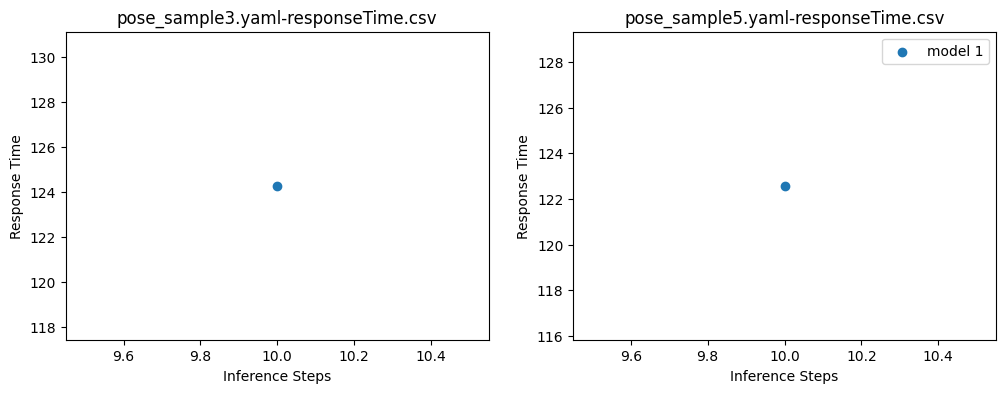

In [ ]:
%cd /content/ict3104-team14-2023/testing

import pandas as pd
import random
import matplotlib.pyplot as plt

selected_csv = selected_files
print(selected_csv)

if len(selected_csv) == 1 :
    df = pd.read_csv(selected_csv[0])
    x = df["inference steps"]
    y = df["response time"]

    plt.scatter(x, y, label='Scatter Plot', color='blue', marker='o')

    plt.xlabel('Inference Steps')
    plt.ylabel('Response Time')
    plt.title(f'Scatter Plot Of Response Time Using {selected_model}')

else :

  # List to store DataFrames
  dataframes = []

  # Read CSV files into DataFrames
  for file_path in selected_csv:
      df = pd.read_csv(file_path)
      dataframes.append(df)

  # Create subplots
  num_subplots = len(dataframes)
  fig, axes = plt.subplots(1, num_subplots, figsize=(num_subplots * 6, 4))

  # Create scatterplots for each DataFrame
  for i, df in enumerate(dataframes):
      x = df['inference steps']  # Replace 'X' with the actual column name from your data
      y = df['response time']  # Replace 'Y' with the actual column name from your data
      axes[i].scatter(x, y, label=f'model {i}')
      axes[i].set_title(f'{selected_csv[i]}')
      axes[i].set_xlabel('Inference Steps')
      axes[i].set_ylabel('Response Time')

  # Add a legend to differentiate between plots
  plt.legend()

  # Display the scatterplots
  plt.show()

# <b>Fréchet Inception Distance (FID) Testing Section</b>

<h5>This section allows you to calculate the Fréchet Inception Distance (FID) of your generated gif outputs against a real image.<h5>


<h3><b>Step 1 : Upload real images</b>

Run this cell and upload all the real images that you want to make comparision with the inferenced gif outputs.<h3>

In [7]:
%cd /content/ict3104-team14-2023/real_images

from google.colab import files
from tqdm import tqdm


# Upload a video file from your local machine
uploaded_images = files.upload()

# Check if any files were uploaded
if not uploaded_images:
  print("No files uploaded.")

else:
  # Assuming a single file was uploaded, get its name and data
  for index in range(len(uploaded_images)):
    uploaded_filename, uploaded_data = list(uploaded_images.items())[index]

    # Define the destination path for the uploaded video file
    destination_path = uploaded_filename

    # Convert data to bytes (if not already) before writing it to the file
    if not isinstance(uploaded_data, bytes):
        uploaded_data = uploaded_data.encode('utf-8')  # Replace 'utf-8' with the appropriate encoding if needed

    # Display a progress bar while saving the uploaded data to a file
    with open(destination_path, 'wb') as file, tqdm(total=len(uploaded_data), unit='B', unit_scale=True) as pbar:
        pbar.set_description("Uploading")
        file.write(uploaded_data)
        pbar.update(len(uploaded_data))
    print(f"File '{uploaded_filename}' has been uploaded and saved in real_images folder.\n")

/content/ict3104-team14-2023/real_images


Saving batman.jpg to batman.jpg


Uploading: 100%|██████████| 152k/152k [00:00<00:00, 75.2MB/s]

File 'batman.jpg' has been uploaded and saved in real_images folder.



<h3><b>Step 2 : Select a real image</b>

Run this cell and select a real image that will be used for the FID testing<h3>

In [8]:
import os
import cv2
from tqdm import tqdm
from ipywidgets import interact, widgets
from IPython.display import display, HTML
from base64 import b64encode
from moviepy.editor import VideoFileClip
import subprocess
from IPython.display import Image
from IPython.display import display, clear_output

# Define the path to the folder containing the files
folder_path = '/content/ict3104-team14-2023/real_images'  # Replace with the actual folder path

# List files in the folder
image_list = os.listdir(folder_path)
image_list.insert(0,"")  # Insert "" at the start of the list

# Create a dropdown widget
image_dropdown = widgets.Dropdown(
    options=image_list,
    description='Select a file:'
)

# Create an output area to display the image
output_area = widgets.Output()

# Function to display the selected image
def display_selected_image(change):
    global selected_image
    selected_image = change.new
    with output_area:
        clear_output(wait=True)  # Clear the previous image
        image_path = selected_image # Replace with the actual path to your images
        display(Image(filename=image_path))

# Attach the function to the widget's observe method
image_dropdown.observe(display_selected_image, names='value')

# Display the widgets
display(image_dropdown)
display(output_area)

Dropdown(description='Select a file:', options=('', 'batman.jpg'), value='')

Output()



<h3><b>Step 3 : Select an inferenced gif output</b>

Run this cell and select an inferenced gif output that will be used for the FID testing<h3>

In [17]:
from ipywidgets import Output, GridspecLayout, Image, Video, HBox
from IPython import display
from ipyfilechooser import FileChooser
import os
from IPython.display import display as display_image


results = []

grid = GridspecLayout(1, 2)

fd = FileChooser('/content/ict3104-team14-2023/checkpoints/inference')

# Create and display a FileChooser widget
out = Output()
with out:
    display.display(fd)
grid[0, 0] = out

# Capture the output from the function
stdout = Output()
grid[0, 1] = stdout

@stdout.capture()
def infer(arg1):
    global selected_gif
    img_path = fd.selected
    selected_gif = img_path
    print(f"Selected gif : {img_path}")
    with open(img_path, "rb") as f:
        display_image({"image/gif": f.read()}, raw=True)

fd.register_callback(infer)

grid

GridspecLayout(children=(Output(layout=Layout(grid_area='widget001')), Output(layout=Layout(grid_area='widget0…

<h3><b>Step 4 : Convert the selected inferenced gif into a static image file</b>

To compare the FID, we need both the real image and the inferneced gif output to be in an image format. Run this cell to convert the gif into an image file. The output will be saved in the gif_to_image folder<h3>

In [18]:
%cd /content/ict3104-team14-2023/gif_to_image
from PIL import Image

path = selected_gif
# Split the path using '/' as the separator
path_parts = path.split('/')
# Extract the second-to-last part and remove the '.gif' extension
desired_section = path_parts[-1].replace('.gif', '')

# Open the GIF file
gif_path = selected_gif
gif_image = Image.open(gif_path)

# Extract the first frame as a static image
static_image = gif_image.convert("RGB")

# Save the static image as a new file
static_image.save(f"{desired_section}.jpg")

# Close the GIF file
gif_image.close()

print(f"Selected gif for conversion : {path_parts[-1]}")
print(f"Image {desired_section}.jpg saved to gif_to_image folder")

/content/ict3104-team14-2023/gif_to_image
Selected gif for conversion : batman.gif
Image batman.jpg saved to gif_to_image folder


<h3><b>Step 5 : Select a static gif image</b>

Now that the gif have been converted to an image file, you can run this cell to select that image file or use previously converted files as well to make other comparisons<h3>

In [21]:
import os
import cv2
from tqdm import tqdm
from ipywidgets import interact, widgets
from IPython.display import display, HTML
from base64 import b64encode
from moviepy.editor import VideoFileClip
import subprocess
from IPython.display import Image
from IPython.display import display, clear_output


# Define the path to the folder containing the files
folder_path = '/content/ict3104-team14-2023/gif_to_image'  # Replace with the actual folder path

# List files in the folder
image_list = os.listdir(folder_path)
image_list.insert(0,"")  # Insert "" at the start of the list

# Create a dropdown widget
gif_image_dropdown = widgets.Dropdown(
    options=image_list,
    description='Select a file:'
)

# Create an output area to display the image
output_area = widgets.Output()

# Function to display the selected image
def display_selected_gif_image(change):
    global selected_gif_image
    selected_gif_image = change.new
    with output_area:
        clear_output(wait=True)  # Clear the previous image
        image_path = selected_gif_image # Replace with the actual path to your images
        display(Image(filename=image_path))

# Attach the function to the widget's observe method
gif_image_dropdown.observe(display_selected_gif_image, names='value')

# Display the widgets
display(gif_image_dropdown)
display(output_area)

Dropdown(description='Select a file:', options=('', 'batman.jpg'), value='')

Output()

<h3><b>Step 5 : Calculate the FID</b>

Run this cell to calculate the FID between the two images. <h3>

Real Image : batman.jpg


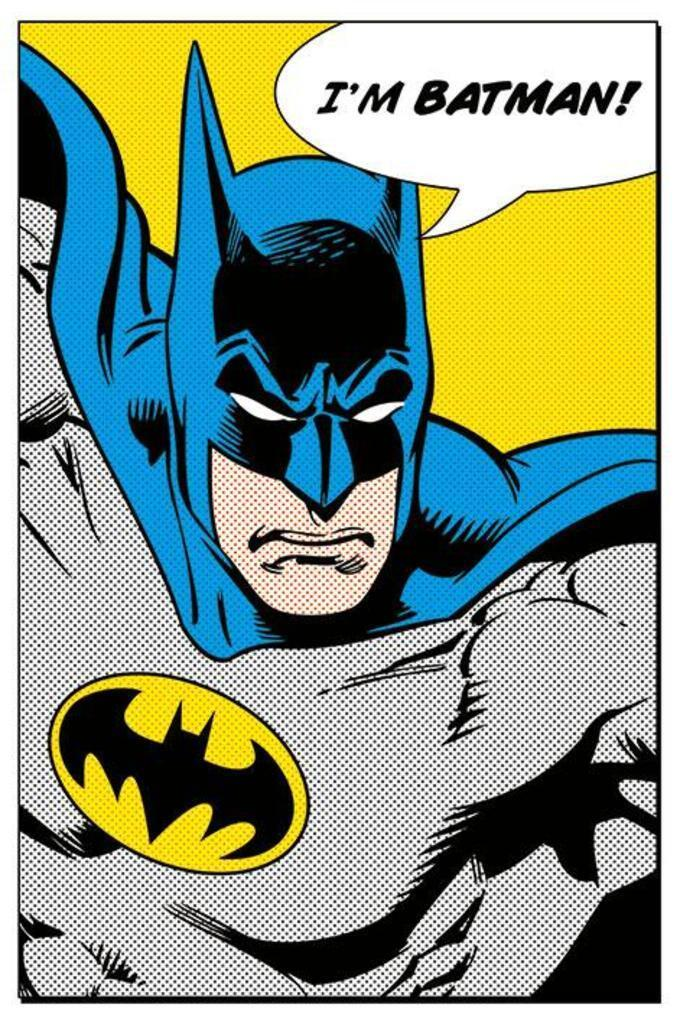

Gif Image : batman.jpg


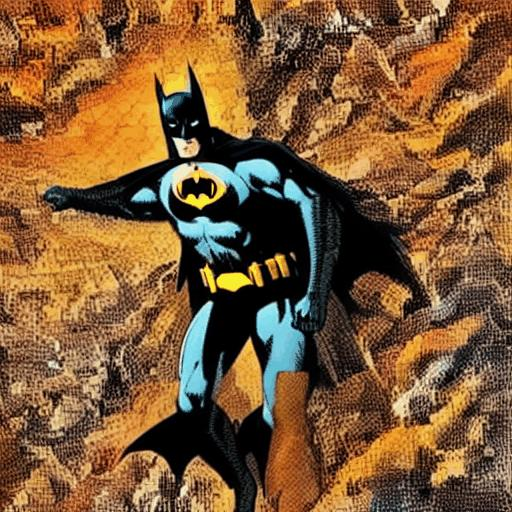

FID between the two images: 13.398626


In [23]:
import tensorflow as tf
import tensorflow_hub as hub
from IPython.display import Image

# Load the Inception model from TensorFlow Hub
inception_v3 = hub.load("https://tfhub.dev/google/tf2-preview/inception_v3/feature_vector/4")

def load_and_preprocess_image(image_path):
    # Load the image using TensorFlow
    image = tf.io.read_file(image_path)
    image = tf.image.decode_image(image, channels=3)  # Ensure 3 color channels (RGB)

    # Preprocess the image to match the Inception model's input requirements
    image = tf.image.resize(image, (299, 299))  # Resize to the model's expected input size
    image = tf.keras.applications.inception_v3.preprocess_input(image)  # Preprocess the image

    # Expand dimensions to match Inception's input shape
    image = tf.expand_dims(image, axis=0)

    return image

real_img_path = f"/content/ict3104-team14-2023/real_images/{selected_image}"
gif_img_path = f"/content/ict3104-team14-2023/gif_to_image/{selected_gif_image}"

# Load and preprocess the two images
image1 = load_and_preprocess_image(real_img_path)
image2 = load_and_preprocess_image(gif_img_path)

# Generate feature vectors for the images
features1 = inception_v3(image1)
features2 = inception_v3(image2)

# Calculate the FID
fid = tf.norm(features1 - features2, ord='euclidean')


print(f"Real Image : {selected_image}")
display(Image(filename=real_img_path))
print(f"Gif Image : {selected_gif_image}")
display(Image(filename=gif_img_path))
print("FID between the two images:", fid.numpy())


<h5>A lower Fréchet Inception Distance (FID) score is generally better. FID is used as a metric to evaluate the quality of generated images in machine learning. A lower FID score indicates that the generated images are closer in terms of feature statistics to the real images, which suggests higher image quality and better performance of the generative model.<h5>

<b><h3>You have reached the end of the FID Testing section!<h3><b>